# Seed Clustering

# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

- The data comprised kernels belonging to three different varieties of wheat: Kama, Rosa and Canadian, 70 elements each, randomly selected for the experiment.

In [2]:
seed_data = pd.read_csv("https://raw.githubusercontent.com/renatomaaliw3/public_files/master/Data%20Sets/seed-clu.csv")
seed_data.tail(3)

,area,perimeter,compactness,length (kernel),width (kernel),asymmetry coef,length (kernel groove)
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044
209,12.30,13.34,0.8684,5.243,2.974,5.637,5.063


## Data Preprocessing

In [3]:
# NOTE:
# There are exreme value differences between compactnees to area.
# We need to normalize the data since K-Means is sensitive to the scale of the data

In [4]:
# NOTE: We have a validation data and this needs to be inserted before scaling

new_seed = [[11.81, 13.11, 0.842, 15.12,	2.736,	3.498,	5.143]]

new_seed_df = pd.DataFrame(new_seed, index = [210], columns = seed_data.columns)
seed_data = pd.concat([seed_data, new_seed_df], axis = 0)
seed_data.tail(3)

,area,perimeter,compactness,length (kernel),width (kernel),asymmetry coef,length (kernel groove)
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044
209,12.30,13.34,0.8684,5.243,2.974,5.637,5.063
210,11.81,13.11,0.8420,15.120,2.736,3.498,5.143


In [5]:
# NORMALIZATION OF DATA

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
seed_data_scaled = scaler.fit_transform(seed_data)
seed_data_scaled

array([[ 0.14702584,  0.22061345,  0.00588367, ...,  0.14795459,
        -0.987814  , -0.3816571 ],
       [ 0.01614395,  0.0134884 ,  0.43382541, ...,  0.20356463,
        -1.79170114, -0.92100022],
       [-0.18706741, -0.35473392,  1.44647962, ...,  0.21415702,
        -0.6683975 , -1.18862881],
       ...,
       [-1.03091117, -1.02980816, -0.7949182 , ..., -1.11253967,
        -0.06765392, -0.74121918],
       [-0.8724752 , -0.93008129, -0.10427955, ..., -0.74710226,
         1.29487797, -0.70240282],
       [-1.04124395, -1.10652115, -1.22285993, ..., -1.37734939,
        -0.13447746, -0.53896551]])

In [6]:
# Reconstruct the seed_data_scaled to a dataframe

seed_data_scaled = pd.DataFrame(seed_data_scaled, columns = seed_data.columns)
seed_data_scaled.tail(3)

,area,perimeter,compactness,length (kernel),width (kernel),asymmetry coef,length (kernel groove)
208,-1.030911,-1.029808,-0.794918,-0.633434,-1.112540,-0.067654,-0.741219
209,-0.872475,-0.930081,-0.104280,-0.547031,-0.747102,1.294878,-0.702403
210,-1.041244,-1.106521,-1.222860,12.003067,-1.377349,-0.134477,-0.538966


### Feature Selection

In [7]:
# NOTE:
# Highly correlated values should be removed or carefully managed3 in K-Means clustering because:

# 1. Redundancy:
# Highly correlated variables carry similar or duplicate information.
# Including both in the dataset doesn’t add any new or useful information to the
# clustering process but increases the dimensionality unnecessarily.

# 2. Dimensionality Reduction:
# Removing highly correlated features helps reduce the dimensionality of the data,
# which can lead to more efficient computation and better clustering performance. High dimensionality can cause the
# curse of dimensionality, where the distance measures become less meaningful.

# 3. Distance Calculation:
# K-Means clustering relies on distance measures (usually Euclidean distance) to determine cluster assignments.
# If two or more variables are highly correlated, they disproportionately influence the distance calculation,
# effectively "overweighting" the correlated features.

# 4. Cluster Centroid Calculation:
# In K-Means, cluster centroids are calculated as the mean of the data points in a cluster.
# If correlated variables are included, the centroid calculation may be biased towards the correlated dimensions,
# which could lead to suboptimal or misleading clusters.

# 5. Overfitting:
# Including highly correlated features can lead to overfitting, where the clustering model
# captures noise rather than the actual signal in the data. This reduces the generalizability of the clustering results,
# making the clusters less useful for predicting or understanding new data.

# 6. Complexity:
# Removing correlated features can simplify the model, making the clusters easier to interpret.
# With fewer variables, it's easier to understand what each cluster represents,
# which is important for deriving meaningful insights from the clustering results.

### Correlation Analysis

In [8]:
# Calculate the correlation matrix

correlation_matrix = seed_data_scaled.corr()
correlation_matrix

,area,perimeter,compactness,length (kernel),width (kernel),asymmetry coef,length (kernel groove)
area,1.000000,0.994362,0.610615,0.471385,0.970707,-0.228302,0.863537
perimeter,0.994362,1.000000,0.532260,0.480011,0.945064,-0.215988,0.890409
compactness,0.610615,0.532260,1.000000,0.135512,0.763503,-0.329491,0.228998
length (kernel),0.471385,0.480011,0.135512,1.000000,0.401181,-0.103809,0.491483
width (kernel),0.970707,0.945064,0.763503,0.401181,1.000000,-0.255975,0.748759
asymmetry coef,-0.228302,-0.215988,-0.329491,-0.103809,-0.255975,1.000000,-0.010726
length (kernel groove),0.863537,0.890409,0.228998,0.491483,0.748759,-0.010726,1.000000


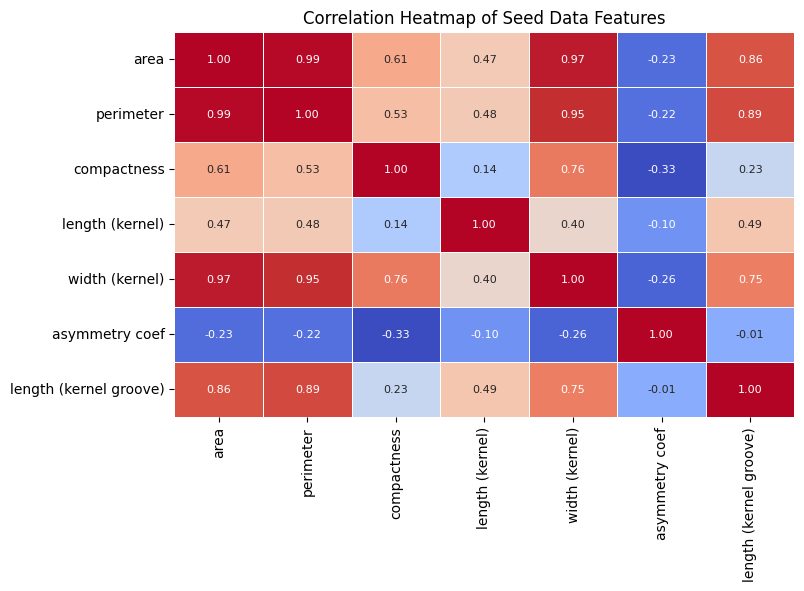

In [9]:
# Correlation in seaborns's heatmap

plt.figure(figsize = (8,5))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', linewidths = 0.5, fmt = '.2f', annot_kws={"size": 8}, cbar = False)
plt.title("Correlation Heatmap of Seed Data Features")
plt.show()

In [10]:
# Find Pairs with highest correlation

correlation_pairs = correlation_matrix[correlation_matrix < 1]
correlation_pairs.unstack().drop_duplicates().sort_values(ascending = False).head(5)

area       perimeter                 0.994362
           width (kernel)            0.970707
perimeter  width (kernel)            0.945064
           length (kernel groove)    0.890409
area       length (kernel groove)    0.863537
dtype: float64

In [11]:
# NOTE:
# Based on correlation values, we will remove:
# 1. perimeter - (Highly correlated to area and length (kernel))
# 2. width (kernel) - (Highly correlated with area)
# 3. length (kernel) - (Highly correlated with area)

In [12]:
# Drop highly correlated features

reduced_seed_data_scaled = seed_data_scaled.drop(columns = ['perimeter', 'width (kernel)', 'length (kernel)'])
reduced_seed_data_scaled.head()

,area,compactness,asymmetry coef,length (kernel groove)
0,0.147026,0.005884,-0.987814,-0.381657
1,0.016144,0.433825,-1.791701,-0.921000
2,-0.187067,1.446480,-0.668398,-1.188629
3,-0.342059,1.043960,-0.962421,-1.229488
4,0.450121,1.378687,-1.566506,-0.473591


## Elbow Method (for number of K)

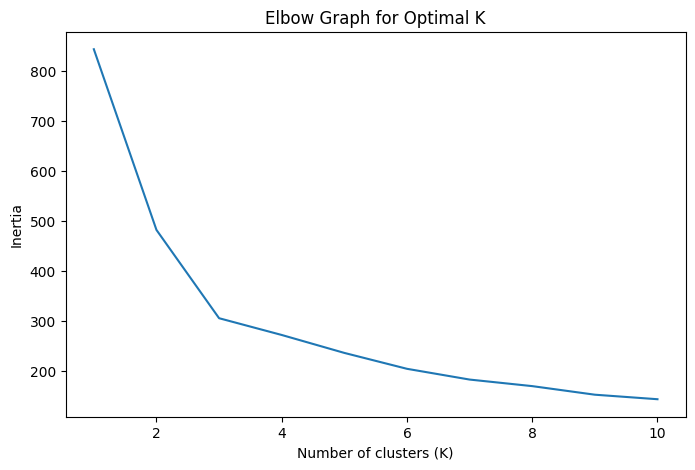

In [13]:
from sklearn.cluster import KMeans

inertia = []

K = range(1, 11)

for k in K: # test 10 Ks

  model = KMeans(n_clusters = k, random_state = 42, n_init = 'auto')
  model.fit(reduced_seed_data_scaled)
  inertia.append(model.inertia_)

# Plot the elbow curve

plt.figure(figsize = (8,5))
plt.plot(K, inertia)
plt.title('Elbow Graph for Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.show()

In [14]:
# NOTE: Based on the Elbow Graph, the optimal K is 3

# K-Means Clustering

In [15]:
# Assign n_clusters = 3

final_model = KMeans(n_clusters = 3, random_state = 42, n_init = 'auto')
reduced_seed_data_scaled['Cluster'] = final_model.fit_predict(reduced_seed_data_scaled)
reduced_seed_data_scaled

,area,compactness,asymmetry coef,length (kernel groove),Cluster
0,0.147026,0.005884,-0.987814,-0.381657,2
1,0.016144,0.433825,-1.791701,-0.921000,2
2,-0.187067,1.446480,-0.668398,-1.188629,2
3,-0.342059,1.043960,-0.962421,-1.229488,2
4,0.450121,1.378687,-1.566506,-0.473591,2
...,...,...,...,...,...
206,-1.241011,-0.837289,0.418153,-0.824981,1
207,-0.562492,0.738893,3.084412,-0.716704,1
208,-1.030911,-0.794918,-0.067654,-0.741219,1
209,-0.872475,-0.104280,1.294878,-0.702403,1


In [16]:
# NOTE: Our data with index 210 belongs to Cluster 1

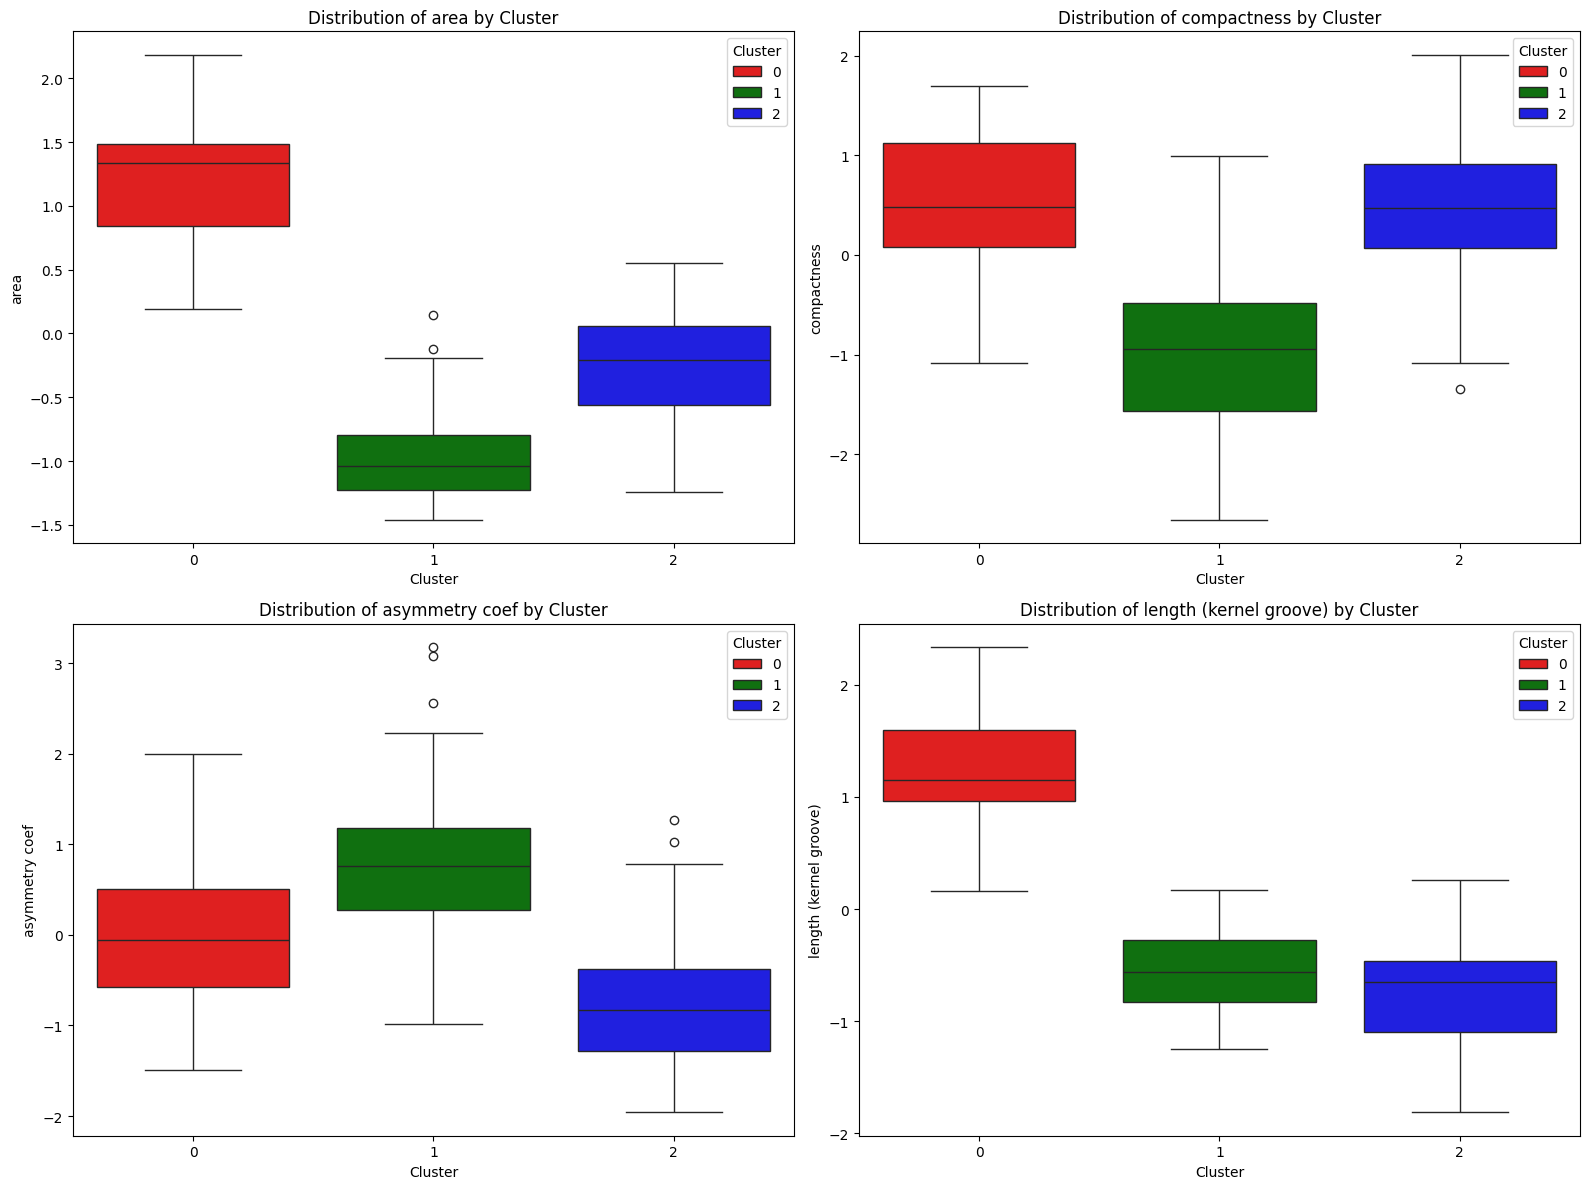

In [17]:
# Let us do some cluster visualizations via boxplots

plt.figure(figsize = (16, 12))

for i, column in enumerate(reduced_seed_data_scaled.columns[:-1], 1):

  plt.subplot(2, 2, i)
  sns.boxplot(x = 'Cluster', y = column, data = reduced_seed_data_scaled, hue = 'Cluster', palette = ['red', 'green', 'blue'])
  plt.title(f'Distribution of {column} by Cluster')

plt.tight_layout()
plt.show()


<Figure size 1000x800 with 0 Axes>

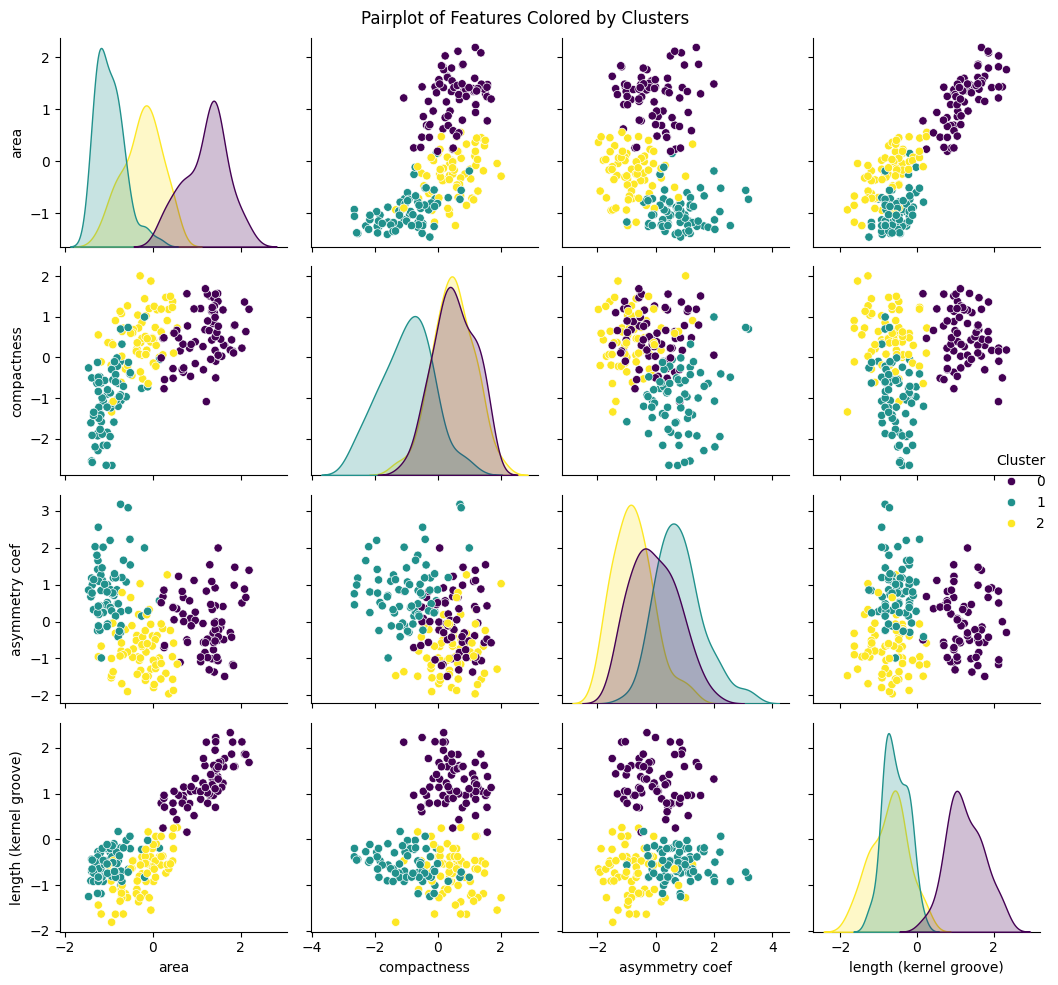

In [18]:
# Visualize the Cluster (Pairplot)

plt.figure(figsize = (10, 8))

sns.pairplot(reduced_seed_data_scaled, hue = 'Cluster', palette = 'viridis', diag_kind = 'kde')
plt.suptitle('Pairplot of Features Colored by Clusters')
plt.tight_layout()
plt.show()

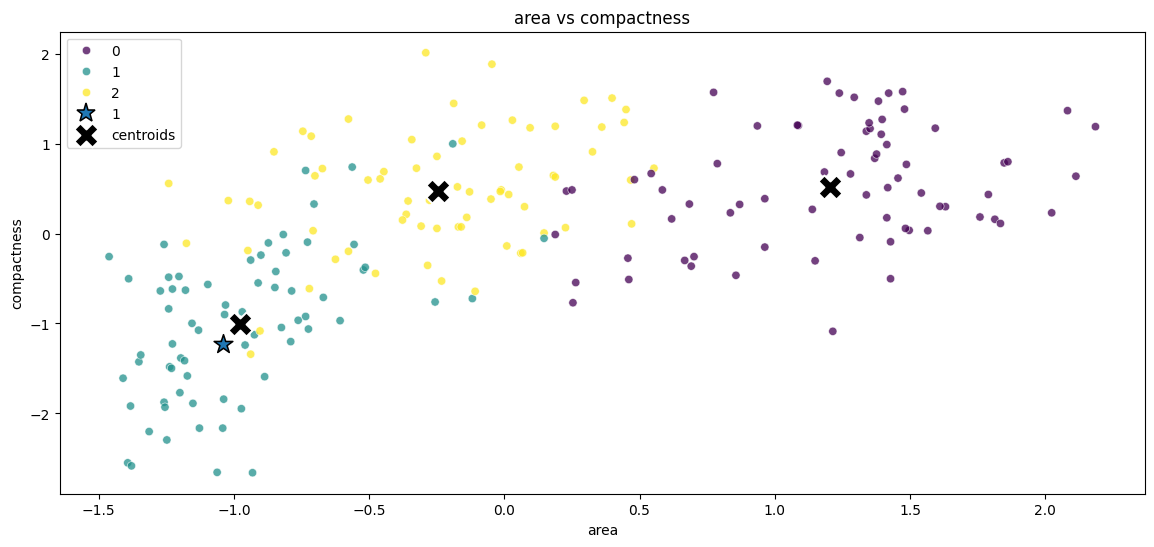

In [19]:
# Visualize (area	vs compactness)

plt.figure(figsize=(14, 6))

# Scatter plot for 'area' vs 'asymmetry coef'

sns.scatterplot(data = reduced_seed_data_scaled, x = 'area', y = 'compactness', hue = 'Cluster', palette = 'viridis', alpha = 0.75)

# Scatter plot for data 210

sns.scatterplot(data = reduced_seed_data_scaled.iloc[210:,:], x = 'area', y = 'compactness', hue = 'Cluster', edgecolor = 'black', marker = '*', s = 200)

# Compute the centroids in the original feature space

centroids = final_model.cluster_centers_
centroids_df = pd.DataFrame(centroids, columns=['area', 'compactness', 'asymmetry coef',	'length (kernel groove)'])

# Scatter plot for Centroids

sns.scatterplot(data = centroids_df, x = centroids_df['area'], y = centroids_df['compactness'], marker = 'X', s = 300, c = 'black', label = 'centroids')

plt.title('area vs compactness')
plt.show()

In [20]:
# centroids_df = pd.DataFrame(centroids, columns=['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4'])
# centroids_df.drop(['Feature 3', 'Feature 4'], inplace = True, axis = 1)

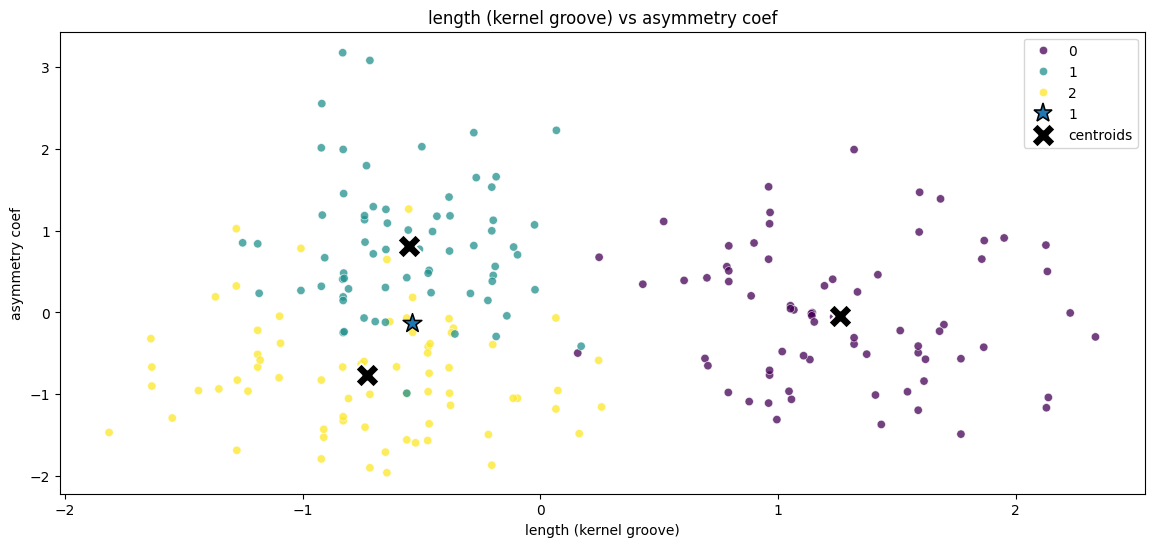

In [21]:
# Visualize (length (kernel groove)	vs asymmetry coef)

plt.figure(figsize=(14, 6))

# Scatter plot for 'length (kernel groove)' vs 'asymmetry coef'

sns.scatterplot(data = reduced_seed_data_scaled, x = 'length (kernel groove)', y = 'asymmetry coef', hue = 'Cluster', palette = 'viridis', alpha = 0.75)
sns.scatterplot(data = reduced_seed_data_scaled.iloc[210:,:], x = 'length (kernel groove)', y = 'asymmetry coef', hue = 'Cluster', edgecolor = 'black', marker = '*', s = 200)

# Scatter plot for Centroids

sns.scatterplot(data = centroids_df, x = centroids_df['length (kernel groove)'], y = centroids_df['asymmetry coef'], marker = 'X', s = 300, c = 'black', label = 'centroids')

plt.title('length (kernel groove) vs asymmetry coef')
plt.show()

In [22]:
# 3D Plot

import plotly.express as px

fig = px.scatter_3d(reduced_seed_data_scaled, x = 'compactness', y = 'area', z = 'asymmetry coef', color = 'Cluster', opacity = 0.8, title = '3D Scatter Plot')
fig.show()

In [23]:
# 3D Plot with Trace

import plotly.graph_objs as go

# Map the cluster labels to string values for the legend

reduced_seed_data_scaled['Cluster Label'] = reduced_seed_data_scaled['Cluster'].apply(lambda x: f'Cluster {x}')

# Create the main 3D scatter plot

fig = px.scatter_3d(reduced_seed_data_scaled,
                    x='compactness',
                    y='area',
                    z='asymmetry coef',
                    color='Cluster Label',
                    opacity=0.8,
                    title='3D Scatter Plot')

# Add the specific data point (index 210) as a separate trace with a black color

fig.add_trace(go.Scatter3d(
    x=[reduced_seed_data_scaled.iloc[210]['compactness']],
    y=[reduced_seed_data_scaled.iloc[210]['area']],
    z=[reduced_seed_data_scaled.iloc[210]['asymmetry coef']],
    mode='markers',
    marker=dict(
        color='black',
        size=10,
        symbol='circle'
    ),
    name='Data 210'
))

# Show the plot
fig.show()

In [24]:
reduced_seed_data_scaled.iloc[210:,:]

,area,compactness,asymmetry coef,length (kernel groove),Cluster,Cluster Label
210,-1.041244,-1.22286,-0.134477,-0.538966,1,Cluster 1


In [25]:
centroids

array([[ 1.20349204,  0.52172921, -0.04460451,  1.26215392],
       [-0.97678708, -1.00114132,  0.81175335, -0.55227398],
       [-0.2438977 ,  0.47195883, -0.76651164, -0.72791071]])